In [1]:
cd ..

c:\Users\Sarthak\Documents\GitHub\po


In [ ]:
import pandas as pd
import numpy as np
from portfolio_models.portfolio_analysis import (
    calculate_portfolio_values,
    plot_daily_returns_histogram,
    calculate_cumulative_return,
    calculate_sharpe_ratio,
    calculate_daily_mean_std,
    plot_portfolio_value_and_daily_return,
    plot_individual_ticker_values
)
from portfolio_models.portfolio_analysis import (
    calculate_portfolio_values,
    plot_daily_returns_histogram,
    calculate_cumulative_return,
    calculate_sharpe_ratio,
    calculate_daily_mean_std,
    plot_portfolio_value_and_daily_return,
    plot_individual_ticker_values,
    calculate_log_returns  # Importing calculate_log_returns
)


# Load selected tickers from file
with open("data/selected_cluster_stocks.txt", "r") as f:
    tickers = [line.strip() for line in f]

# Define the file path template
file_path_template_train = "data_handling/storage/processed_data/train/{}_data.csv"

# Load preprocessed data into a dictionary
data_dict = {}
for ticker in tickers:
    # Load each ticker's data and assume it has 'Normed Return' and other necessary columns
    data_dict[ticker] = pd.read_csv(file_path_template.format(ticker), index_col='Date', parse_dates=True)


In [210]:

closing_prices = pd.DataFrame({ticker: data_dict[ticker]['Adj Close'] for ticker in tickers}).dropna()
daily_returns = pd.DataFrame({ticker: data_dict[ticker]['Returns'] for ticker in tickers}).dropna()
log_returns = calculate_log_returns(data_dict)

In [211]:
daily_returns.index = pd.to_datetime(daily_returns.index).tz_localize(None)
closing_prices.index = pd.to_datetime(closing_prices.index).tz_localize(None)
log_returns.index = pd.to_datetime(log_returns.index).tz_localize(None)

In [212]:
from portfolio_models.minimization_algo import maximize_sharpe_ratio

# Assuming log_returns is already calculated in the notebook
optimization_results = maximize_sharpe_ratio(log_returns.iloc[:100])
optimal_weights = optimization_results['Optimal Weights']

In [213]:
optimization_results

{'Optimal Weights': array([7.89909774e-16, 3.27117361e-01, 0.00000000e+00, 1.14332530e-01,
        1.00472503e-01, 6.05288996e-17, 0.00000000e+00, 4.09485389e-02,
        2.25125693e-01, 7.67649394e-02, 7.57519315e-02, 0.00000000e+00,
        3.94865021e-02]),
 'Expected Return': 0.8692924046043186,
 'Expected Volatility': 0.1582429793709459,
 'Sharpe Ratio': 5.493402665065876}

In [240]:
import numpy as np
import pandas as pd

# Assuming `returns` is your DataFrame with historical daily returns for each stock
# and `optimal_weights` is a list of dictionaries or DataFrames containing weights over time

# Set the look-back window
look_back_window = 50

# Create lists to hold the inputs and outputs
X = []  # Feature set
y = []  # Target weights

# Assuming `optimal_weights` is a list of dictionaries containing weights over time
for i in range(len(log_returns) - look_back_window):
    # Get the features for the current window (look-back period)
    window_data = log_returns.iloc[i: i + look_back_window]
    print(f"{i} of ",len(log_returns) - look_back_window)
    
    # Convert window_data to a NumPy array and add it to the input list
    X.append(window_data.to_numpy())
    optimization_results = maximize_sharpe_ratio(window_data)
    optimal_weights = optimization_results['Optimal Weights']
    # Get the corresponding optimal weights for the end of the window
    # (assuming `optimal_weights` is aligned properly with the returns data)
    y.append(optimal_weights)  # Use weights after the window

# Convert X and y to NumPy arrays for easier usage with machine learning frameworks
X = np.array(X)
y = np.array(y)

# The shape of X should now be: (number_of_samples, look_back_window, number_of_features)
# The shape of y should be: (number_of_samples, number_of_assets)
print(f"Input shape (X): {X.shape}")
print(f"Target shape (y): {y.shape}")


0 of  2467
1 of  2467
2 of  2467
3 of  2467
4 of  2467
5 of  2467
6 of  2467
7 of  2467
8 of  2467
9 of  2467
10 of  2467
11 of  2467
12 of  2467
13 of  2467
14 of  2467
15 of  2467
16 of  2467
17 of  2467
18 of  2467
19 of  2467
20 of  2467
21 of  2467
22 of  2467
23 of  2467
24 of  2467
25 of  2467
26 of  2467
27 of  2467
28 of  2467
29 of  2467
30 of  2467
31 of  2467
32 of  2467
33 of  2467
34 of  2467
35 of  2467
36 of  2467
37 of  2467
38 of  2467
39 of  2467
40 of  2467
41 of  2467
42 of  2467
43 of  2467
44 of  2467
45 of  2467
46 of  2467
47 of  2467
48 of  2467
49 of  2467
50 of  2467
51 of  2467
52 of  2467
53 of  2467
54 of  2467
55 of  2467
56 of  2467
57 of  2467
58 of  2467
59 of  2467
60 of  2467
61 of  2467
62 of  2467
63 of  2467
64 of  2467
65 of  2467
66 of  2467
67 of  2467
68 of  2467
69 of  2467
70 of  2467
71 of  2467
72 of  2467
73 of  2467
74 of  2467
75 of  2467
76 of  2467
77 of  2467
78 of  2467
79 of  2467
80 of  2467
81 of  2467
82 of  2467
83 of  2467
84

In [241]:
from sklearn.model_selection import train_test_split

# Assuming X and y are already prepared as NumPy arrays
# Split X and y into training (80%) and validation (20%) sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.08, shuffle=False)

print("Training data shape:", X_train.shape, y_train.shape)
print("Validation data shape:", X_val.shape, y_val.shape)


Training data shape: (2269, 50, 13) (2269, 13)
Validation data shape: (198, 50, 13) (198, 13)


In [242]:
from sklearn.preprocessing import StandardScaler

# Flatten X_train and X_val to apply normalization on all features
X_train_flat = X_train.reshape(-1, X_train.shape[-1])
X_val_flat = X_val.reshape(-1, X_val.shape[-1])

# Normalize using StandardScaler (fit on training data and transform on both training and validation)
scaler = StandardScaler()
X_train_scaled_flat = scaler.fit_transform(X_train_flat)
X_val_scaled_flat = scaler.transform(X_val_flat)

# Reshape back to original dimensions
X_train_scaled = X_train_scaled_flat.reshape(X_train.shape)
X_val_scaled = X_val_scaled_flat.reshape(X_val.shape)

print("Training data shape after scaling:", X_train_scaled.shape)
print("Validation data shape after scaling:", X_val_scaled.shape)


Training data shape after scaling: (2269, 50, 13)
Validation data shape after scaling: (198, 50, 13)


In [120]:
allocations = {ticker: 1 / 13 for ticker in tickers}
start_amount = 10000

# Calculate portfolio values
portfolio_df_equal = calculate_portfolio_values(data_dict, allocations, start_amount)

In [207]:
weights = y_pred[-1]
allocation_dict = {ticker: weight for ticker, weight in zip(tickers, weights)}

In [200]:
y_val[-1]

array([1.48097554e-16, 3.50168268e-16, 0.00000000e+00, 0.00000000e+00,
       2.32851034e-15, 0.00000000e+00, 3.42529938e-01, 1.48028491e-02,
       0.00000000e+00, 1.05013360e-01, 9.52953199e-02, 4.42358533e-01,
       2.71815693e-15])

In [135]:
portfolio_df_tcn = calculate_portfolio_values(data_dict, allocations, start_amount)

In [137]:
def check_result(allocations):
    portfolio_df = calculate_portfolio_values(data_dict, allocations, start_amount)

# Plot histogram of daily returns
    plot_daily_returns_histogram(portfolio_df)
    # Calculate cumulative return
    cumulative_return = calculate_cumulative_return(portfolio_df)
    print(f"Cumulative Portfolio Return: {cumulative_return:.2%}")

    # Calculate Sharpe Ratio and Annualized Sharpe Ratio
    sharpe_ratio, annualized_sharpe_ratio = calculate_sharpe_ratio(portfolio_df)
    print(f"Daily Sharpe Ratio: {sharpe_ratio:.4f}")
    print(f"Annualized Sharpe Ratio: {annualized_sharpe_ratio:.4f}")

    # Calculate mean and standard deviation of daily returns
    mean_return, std_dev = calculate_daily_mean_std(portfolio_df)
    print(f"Mean of Total Daily Return: {mean_return:.4%}")
    print(f"Standard Deviation of Total Daily Return: {std_dev:.4%}")

    # Plot total portfolio value and daily returns on the same chart
    plot_portfolio_value_and_daily_return(portfolio_df)

    # Plot individual ticker values over time
    plot_individual_ticker_values(portfolio_df, tickers)

In [265]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Layer
from tensorflow.keras.models import Model
from tcn import TCN
import keras.backend as K
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import Lambda



class SharpeRatioLossLayer(Layer):
    def __init__(self, risk_free_rate=0.01, diversification_penalty=0.01, **kwargs):
        super(SharpeRatioLossLayer, self).__init__(**kwargs)
        self.risk_free_rate = risk_free_rate
        self.diversification_penalty = diversification_penalty

    def call(self, inputs):
        # Unpack inputs
        y_pred, historical_returns = inputs  # y_pred: predicted weights, historical_returns: asset returns

        # Expand dimensions of y_pred to match the shape of historical_returns
        y_pred_expanded = tf.expand_dims(y_pred, axis=1)
        y_pred_expanded = tf.tile(y_pred_expanded, [1, historical_returns.shape[1], 1])
        
        # Calculate portfolio returns
        portfolio_returns = tf.reduce_sum(y_pred_expanded * historical_returns, axis=-1)

        # Calculate expected return and portfolio volatility
        expected_return = tf.reduce_mean(portfolio_returns, axis=-1)
        excess_return = expected_return - self.risk_free_rate
        portfolio_volatility = tf.math.reduce_std(portfolio_returns, axis=-1)
        sharpe_ratio = excess_return / (portfolio_volatility + K.epsilon())

        # Diversification penalty: penalizes large allocations to single assets
        diversification_penalty = self.diversification_penalty * tf.reduce_sum(tf.square(y_pred), axis=-1)

        # Total loss = negative Sharpe Ratio + diversification penalty
        loss = 1-tf.reduce_mean(sharpe_ratio) + tf.reduce_mean(diversification_penalty)
        
        self.add_loss(loss)
        return y_pred  # Return y_pred as we need it as the output for the model

# Define the TCN model parameters
look_back_window = X_train_scaled.shape[1]  # Number of time steps in each sequence (e.g., 50 days)
n_features = X_train_scaled.shape[2]
# Number of features (e.g., number of assets)
n_assets = y_train.shape[1]  # Number of output assets (weights)
y_train_placeholder = np.ones((X_train_scaled.shape[0], n_assets))/n_assets
y_val_placeholder = np.ones((X_val_scaled.shape[0], n_assets))/n_assets
# Input layers
historical_returns_input = Input(shape=(look_back_window, n_features))  # Input for historical returns

# TCN model definition
# Example of increased TCN complexity
tcn_output = TCN(
    nb_filters=32,  # Increased number of filters
    kernel_size=3,   # Larger kernel size
    nb_stacks=3,     # More stacks for added depth
    padding='causal',
    dropout_rate=0.2,  # Adjust dropout for regularization
    return_sequences=False
)(historical_returns_input)

dense_output = Dense(64, activation='relu')(tcn_output)

raw_weights = Dense(n_assets, activation='sigmoid')(dense_output)
y_pred = Lambda(lambda x: x / tf.reduce_sum(x, axis=1, keepdims=True))(raw_weights)
# Custom Sharpe Ratio loss layer
sharpe_ratio_layer = SharpeRatioLossLayer()([y_pred, historical_returns_input])

# Create the model
model = Model(inputs=historical_returns_input, outputs=sharpe_ratio_layer)

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# Compile the model with a smaller learning rate
model.compile(optimizer=Adam(learning_rate=1e-3), loss=None)

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)


In [266]:
model.summary()

Model: "model_23"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_25 (InputLayer)       [(None, 50, 13)]             0         []                            
                                                                                                  
 tcn_23 (TCN)                (None, 32)                   110368    ['input_25[0][0]']            
                                                                                                  
 dense_31 (Dense)            (None, 64)                   2112      ['tcn_23[0][0]']              
                                                                                                  
 dense_32 (Dense)            (None, 13)                   845       ['dense_31[0][0]']            
                                                                                           

In [267]:

# Train the model
history = model.fit(
    X_train_scaled, y_train_placeholder,
    validation_data=(X_val_scaled, y_val_placeholder),
    epochs=50,
    batch_size=32,  # Increase batch size for stability
    callbacks=[early_stopping, reduce_lr]
)



Epoch 1/50
71/71 [==============================] - 40s 320ms/step - loss: 1.0144 - val_loss: 1.0105 - lr: 0.0010
Epoch 2/50
71/71 [==============================] - 19s 269ms/step - loss: 1.0144 - val_loss: 1.0280 - lr: 0.0010
Epoch 3/50
71/71 [==============================] - 19s 269ms/step - loss: 1.0127 - val_loss: 1.0280 - lr: 0.0010
Epoch 4/50
71/71 [==============================] - 19s 272ms/step - loss: 1.0124 - val_loss: 1.0280 - lr: 0.0010
Epoch 5/50
71/71 [==============================] - 20s 276ms/step - loss: 1.0128 - val_loss: 1.0280 - lr: 0.0010
Epoch 6/50
71/71 [==============================] - 19s 272ms/step - loss: 1.0127 - val_loss: 1.0280 - lr: 0.0010


In [256]:
y_pred = model.predict(X_val)

7/7 [==============================] - 2s 38ms/step


In [257]:
file_path_template_test = "data_handling/storage/processed_data/test/{}_data.csv"

# Load preprocessed data into a dictionary
data_dict = {}
for ticker in tickers:
    # Load each ticker's data and assume it has 'Normed Return' and other necessary columns
    data_dict[ticker] = pd.read_csv(file_path_template_test.format(ticker), index_col='Date', parse_dates=True)[:125]


In [260]:
weights = y_pred[-2]
allocation_dict = {ticker: weight for ticker, weight in zip(tickers, weights)}

In [264]:
weights.sum()

1.0

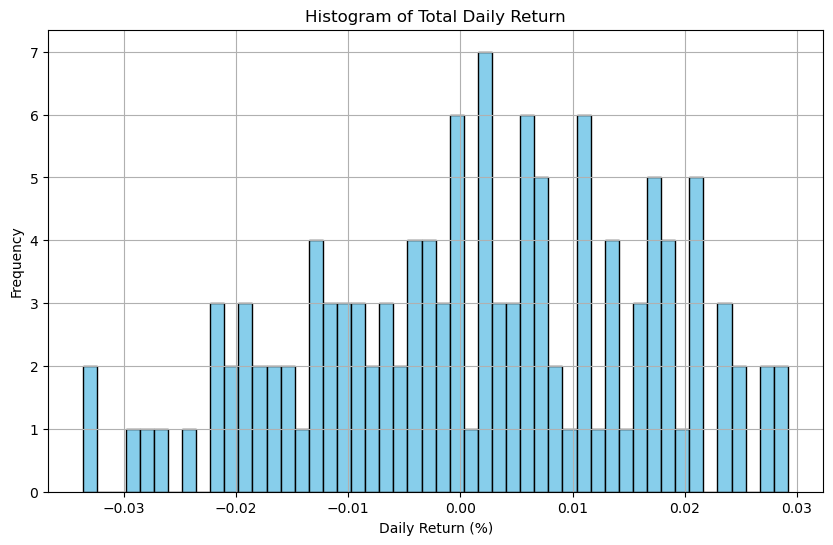

Cumulative Portfolio Return: 17.27%
Daily Sharpe Ratio: 0.0909
Annualized Sharpe Ratio: 1.4425
Mean of Total Daily Return: 0.1384%
Standard Deviation of Total Daily Return: 1.4796%


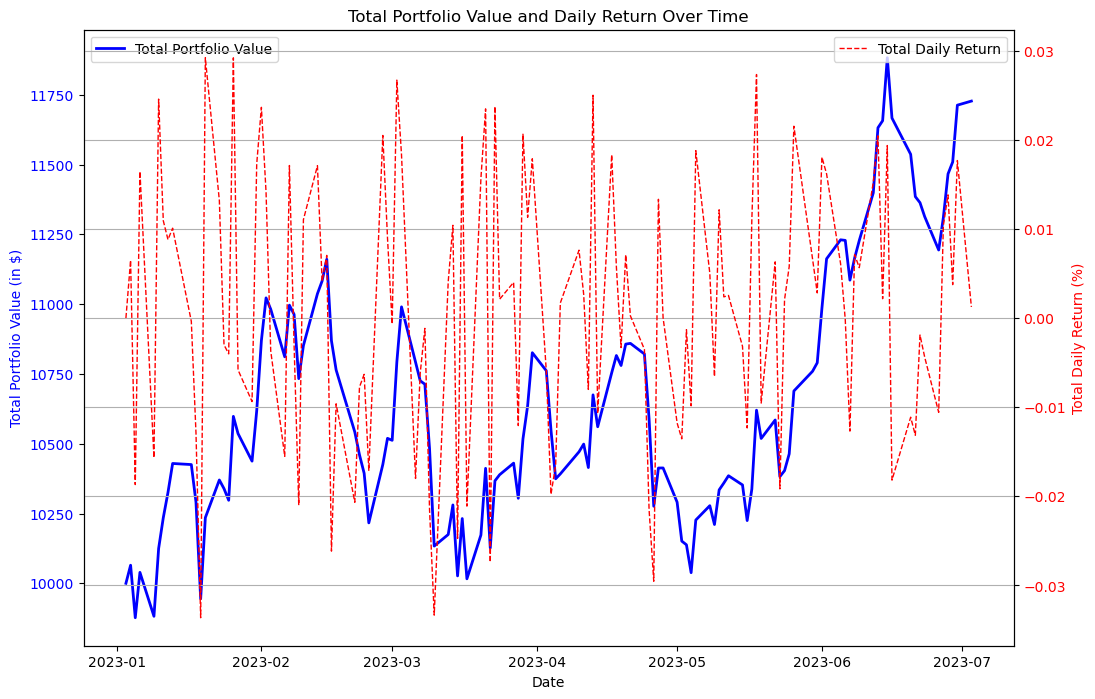

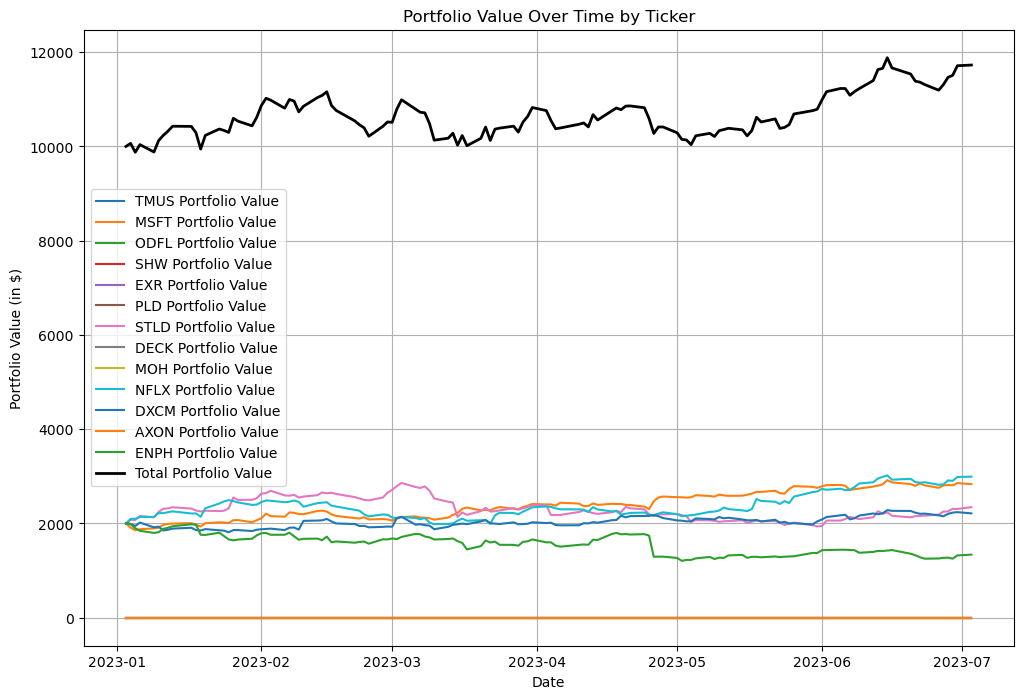

In [263]:
check_result(allocation_dict)

In [236]:
std_dev_allocations = np.std(y_pred, axis=0)
print("Standard deviation of allocations for each asset:", std_dev_allocations)

Standard deviation of allocations for each asset: [0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 3.874302e-07
 0.000000e+00 3.874302e-07 0.000000e+00 3.874302e-07 0.000000e+00
 3.874302e-07 0.000000e+00 3.874302e-07]
